# Image classification

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from perceiver.model import LitImageClassifier

In [2]:
from torchvision.datasets import MNIST
from perceiver.data import MNISTPreprocessor

mnist = MNIST(root='../.cache', train=False)
mnist_preproc = MNISTPreprocessor()

In [3]:
# Download model checkpoints
!wget -nc -O logs.zip https://martin-krasser.com/perceiver/logs-update-1.zip
!unzip -qo logs.zip

File ‘logs.zip’ already there; not retrieving.


In [4]:
ckpt_path = 'logs/img_clf/version_0/checkpoints/epoch=013-val_loss=0.093.ckpt'

model = LitImageClassifier.load_from_checkpoint(ckpt_path).model
model.eval();

In [5]:
cols, rows = 3, 3
imgs = [mnist[i][0] for i in range(cols * rows)]

In [6]:
with torch.no_grad():
    logits = model(mnist_preproc.preprocess_batch(imgs))
    preds = logits.argmax(dim=1)

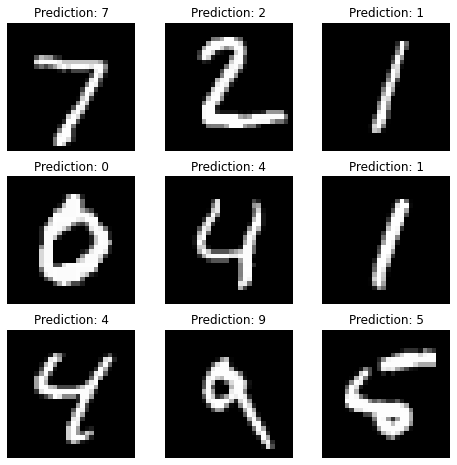

In [7]:
plt.figure(figsize=(8, 8))
for i, (img, pred) in enumerate(zip(imgs, preds)):
    plt.subplot(rows, cols, i + 1)
    plt.axis('off')
    plt.title(f'Prediction: {pred}')
    plt.imshow(np.array(img), cmap='gray')